In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


## Import data related to immigration

In [7]:
df_im=pd.read_excel('2022_0920_plcy_state_immigration_data_sheets_fy2021.xlsx',sheet_name='All States per Million 2021',header=4)
df_im.head(6)

,Unnamed: 0,Unnamed: 1,Total,Rank,Adjustments,Rank.1,New Arrivals,Rank.2,Total.1,Rank.3,Total.2,Rank.4,Total.3,Rank.5,Total.4,Rank.6
0,Alabama,5039877.0,572.831440,47.0,390.287303,47.0,182.544137,48.0,9899.646360,39.0,320.245911,51.0,0,D,4.96,45
1,Alaska,732673.0,1038.662541,34.0,582.797510,41.0,455.865031,23.0,66032.186255,6.0,1214.730173,27.0,16.378384,38,D,D
2,Arizona,7276316.0,1988.093975,15.0,1443.862526,13.0,544.231449,17.0,66814.442913,5.0,2406.712408,14.0,57.996382,8,20.752,28
3,Arkansas,3025891.0,854.624307,39.0,596.848994,40.0,257.775313,38.0,9765.057631,40.0,685.417948,43.0,13.549728,40,3.966,47
4,California,39237836.0,3445.169606,4.0,2425.261169,3.0,1019.908437,3.0,47394.841041,8.0,4380.032579,3.0,25.128807,35,132.449,3
5,Colorado,5812069.0,1745.677830,18.0,1251.189551,18.0,494.488279,19.0,28745.701402,15.0,1517.359825,22.0,45.594779,17,23.228,27


In [8]:
df_im.columns=['States','Population','Lawful permanent residents - Total','Lawful permanent residents - Rank',
               'Lawful permanent residents - Adjustment','Lawful permanent residents - Adjustment Rank',
               'Lawful permanent residents - New arrivals','Lawful permanent residents - New arrivals Rank',
               'Nonimmigrants Total','Nonimmigrants Rank','Naturalizations Total','Naturalizations Rank',
               'Refugees Total','Refugees Rank','Asylees Total','Asylees Rank']
df_im.head()

,States,Population,Lawful permanent residents - Total,Lawful permanent residents - Rank,Lawful permanent residents - Adjustment,Lawful permanent residents - Adjustment Rank,Lawful permanent residents - New arrivals,Lawful permanent residents - New arrivals Rank,Nonimmigrants Total,Nonimmigrants Rank,Naturalizations Total,Naturalizations Rank,Refugees Total,Refugees Rank,Asylees Total,Asylees Rank
0,Alabama,5039877.0,572.831440,47.0,390.287303,47.0,182.544137,48.0,9899.646360,39.0,320.245911,51.0,0,D,4.96,45
1,Alaska,732673.0,1038.662541,34.0,582.797510,41.0,455.865031,23.0,66032.186255,6.0,1214.730173,27.0,16.378384,38,D,D
2,Arizona,7276316.0,1988.093975,15.0,1443.862526,13.0,544.231449,17.0,66814.442913,5.0,2406.712408,14.0,57.996382,8,20.752,28
3,Arkansas,3025891.0,854.624307,39.0,596.848994,40.0,257.775313,38.0,9765.057631,40.0,685.417948,43.0,13.549728,40,3.966,47
4,California,39237836.0,3445.169606,4.0,2425.261169,3.0,1019.908437,3.0,47394.841041,8.0,4380.032579,3.0,25.128807,35,132.449,3


## Imported data related to personal income

In [14]:
df_inc=pd.read_csv('SQINC4__ALL_AREAS_1948_2023.csv')
df_inc.head(5)

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1948:Q1,1948:Q2,...,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2
0,"""00000""",United States,,SQINC4,10.0,...,"Personal income (millions of dollars, seasonal...",Millions of dollars,204641.7,210069.4,...,22147826.5,21031135.9,21124208.1,21268077.5,21395331.0,21640433.8,21995492.2,22249735.0,22618087.4,22857766.7
1,"""00000""",United States,,SQINC4,11.0,...,Nonfarm personal income 1/,Millions of dollars,187286.5,189282.1,...,22066181.5,20902892.4,21004486.2,21174547.8,21292325.1,21525801.2,21883686.5,22137023.2,22517586.4,22769925.4
2,"""00000""",United States,,SQINC4,12.0,...,Farm income 2/,Millions of dollars,17355.2,20787.3,...,81645.0,128243.5,119721.9,93529.6,103005.9,114632.6,111805.7,112711.8,100501.0,87841.3
3,"""00000""",United States,,SQINC4,20.0,...,"Population (midperiod, persons) 3/",Number of persons,(NA),(NA),...,331744065.0,331901960.0,332229899.0,332536080.0,332727966.0,333070786.0,333549569.0,334032634.0,334391329.0,334769235.0
4,"""00000""",United States,,SQINC4,30.0,...,Per capita personal income (dollars) 4/,Dollars,(NA),(NA),...,66762.0,63366.0,63583.0,63957.0,64303.0,64972.0,65944.0,66609.0,67640.0,68279.0


In [24]:
df_inc1=df_inc[df_inc.Description=='Personal income (millions of dollars, seasonally adjusted) ']
df_inc1=df_inc1.reset_index()
df_inc1.head(3)

,index,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1948:Q1,...,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2
0,0,"""00000""",United States,,SQINC4,10.0,...,"Personal income (millions of dollars, seasonal...",Millions of dollars,204641.7,...,22147826.5,21031135.9,21124208.1,21268077.5,21395331.0,21640433.8,21995492.2,22249735.0,22618087.4,22857766.7
1,20,"""01000""",Alabama,5,SQINC4,10.0,...,"Personal income (millions of dollars, seasonal...",Millions of dollars,2496.0,...,266593.2,245905.6,247487.7,251181.2,252387.8,255728.9,260858.5,264473.5,269220.9,270754.1
2,40,"""02000""",Alaska *,8,SQINC4,10.0,...,"Personal income (millions of dollars, seasonal...",Millions of dollars,(NA),...,49925.2,47397.6,47485.1,48023.9,49140.4,50110.1,50838.0,51310.2,51224.5,51779.2


## Data Analysis

In [28]:
df_im['Nonimmigrants Total'].head()

0     9899.646360
1    66032.186255
2    66814.442913
3     9765.057631
4    47394.841041
Name: Nonimmigrants Total, dtype: float64

In [29]:
df_inc1['2021:Q4'].head()

0    21268077.5
1      251181.2
2       48023.9
3      410880.1
4      154713.6
Name: 2021:Q4, dtype: float64

In [83]:
dim=pd.DataFrame({'States':df_inc1['GeoName'],'Personnal incomme':df_inc1['2021:Q4']})
dinc=pd.DataFrame({'States':df_im['States'],'Population':df_im['Population'],'Nonimmigrants (% of population)':df_im['Nonimmigrants Total']/df_im['Population']})

In [84]:
dim.shape,dinc.shape

((60, 2), (56, 3))

In [85]:
dim=dim.set_index('States')
dinc=dinc.set_index('States')
dim.head(3),dinc.head(3)

(               Personnal incomme
 States                          
 United States         21268077.5
 Alabama                 251181.2
 Alaska *                 48023.9,
          Population  Nonimmigrants (% of population)
 States                                              
 Alabama   5039877.0                         0.001964
 Alaska     732673.0                         0.090125
 Arizona   7276316.0                         0.009182)

In [86]:

pd.merge(dim,dinc,right_index=True,left_index=True)


,Personnal incomme,Population,Nonimmigrants (% of population)
States,,,
Alabama,251181.2,5039877.0,0.001964
Arizona,410880.1,7276316.0,0.009182
Arkansas,154713.6,3025891.0,0.003227
California,2987527.9,39237836.0,0.001208
Colorado,423859.2,5812069.0,0.004946
Connecticut,292265.6,3605597.0,0.005492
Delaware,58424.6,1003384.0,0.013367
District of Columbia,64570.1,670050.0,0.183272
Florida,1383922.5,21781128.0,0.006656


Some states do not appear in the previous result of data frame merge, because in data frame 'dim' and asterisk is added to their names, such as Alaska

In [87]:
dim.head()

,Personnal incomme
States,
United States,21268077.5
Alabama,251181.2
Alaska *,48023.9
Arizona,410880.1
Arkansas,154713.6


In [88]:
y=list()
for i in dim.index:
    if '*' in i:
        y.append(i[:-2])
    else:
        y.append(i)
    
dim.index=y

In [89]:
pd.merge(dim,dinc,right_index=True,left_index=True)

,Personnal incomme,Population,Nonimmigrants (% of population)
Alabama,251181.2,5039877.0,0.001964
Alaska,48023.9,732673.0,0.090125
Arizona,410880.1,7276316.0,0.009182
Arkansas,154713.6,3025891.0,0.003227
California,2987527.9,39237836.0,0.001208
Colorado,423859.2,5812069.0,0.004946
Connecticut,292265.6,3605597.0,0.005492
Delaware,58424.6,1003384.0,0.013367
District of Columbia,64570.1,670050.0,0.183272
Florida,1383922.5,21781128.0,0.006656


Merge data frames and compare data to verify if they are correct

In [90]:
df=pd.merge(dim,dinc,right_index=True,left_index=True)
df.tail(),dinc.tail(10),dim.tail(10)

(               Personnal incomme  Population  Nonimmigrants (% of population)
 Virginia                578951.4   8642274.0                         0.002048
 Washington              574615.2   7738692.0                         0.004059
 West Virginia            86405.6   1782959.0                         0.002581
 Wisconsin               353171.9   5895908.0                         0.001436
 Wyoming                  41047.1    578803.0                         0.017393,
                                                     Population  \
 States                                                           
 Vermont                                               645570.0   
 Virginia                                             8642274.0   
 Washington                                           7738692.0   
 West Virginia                                        1782959.0   
 Wisconsin                                            5895908.0   
 Wyoming                                               5

### Make the plot

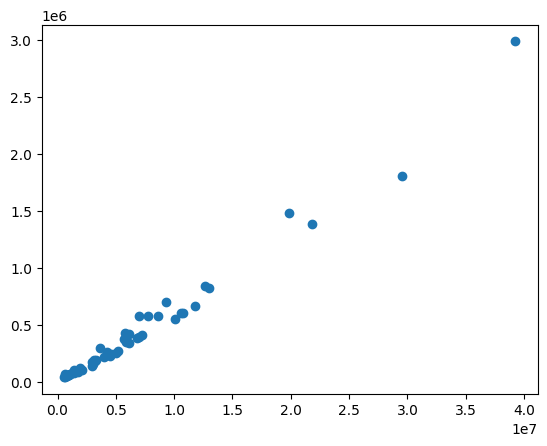

In [91]:
fig=plt.subplot()

# plt.scatter(df['Nonimmigrants (% of population)'],df['Personnal incomme'])
plt.scatter(df['Population'],df['Personnal incomme'])